In [130]:
import pandas as pd
import os
import numpy as np
import copy, math
%matplotlib widget
import matplotlib.pyplot as plt
# from lab_utils_common import plot_data, sigmoid, dlc
plt.style.use('./deeplearning.mplstyle')
from sklearn.decomposition import PCA
from plt_quad_logistic import plt_quad_logistic, plt_prob



In [104]:
pca = PCA(n_components=2)
DIABETIES_PATH = os.path.join("datasets", "diabetes")
def load_diabeties_data(housing_path=DIABETIES_PATH):
    csv_path = os.path.join(housing_path, "diabetes.csv")
    return pd.read_csv(csv_path)

df = pd.read_csv("datasets/diabetes/diabetes.csv")
# diabetes = load_diabeties_data()
# diabetes.head()
# diabetes.info()

X_train = df[["Glucose", "BMI"]].values
y_train = df["Outcome"].values.reshape(-1)
cols_with_zero = ["Glucose", "BMI"]
print(X_train)
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)
df.fillna(df.median(), inplace=True)

[[148.   33.6]
 [ 85.   26.6]
 [183.   23.3]
 ...
 [121.   26.2]
 [126.   30.1]
 [ 93.   30.4]]


In [105]:
## Z-score normalizing
mu = np.mean(X_train, axis=0)
sigma = np.std(X_train, axis=0)
X_mean = (X_train - mu)
X_norm = X_mean / sigma
print(X_norm)

[[ 0.84832379  0.20401277]
 [-1.12339636 -0.68442195]
 [ 1.94372388 -1.10325546]
 ...
 [ 0.00330087 -0.73518964]
 [ 0.1597866  -0.24020459]
 [-0.8730192  -0.20212881]]


In [106]:
dlc = dict(dlblue = '#0096ff', dlorange = '#FF9300', dldarkred='#C00000', dlmagenta='#FF40FF', dlpurple='#7030A0')
dlblue = '#0096ff'; dlorange = '#FF9300'; dldarkred='#C00000'; dlmagenta='#FF40FF'; dlpurple='#7030A0'
dlcolors = [dlblue, dlorange, dldarkred, dlmagenta, dlpurple]

def plot_data(X, y, ax, pos_label="y=1", neg_label="y=0", s=80, loc='best' ):
    """ plots logistic data with two axis """
    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0
    pos = pos.reshape(-1,)  #work with 1D or 1D y vectors
    neg = neg.reshape(-1,)

    # Plot examples
    ax.scatter(X[pos, 0], X[pos, 1], marker='x', s=s, c = 'red', label=pos_label)
    ax.scatter(X[neg, 0], X[neg, 1], marker='o', s=s, label=neg_label, facecolors='none', edgecolors=dlblue, lw=3)
    ax.legend(loc=loc)

    ax.figure.canvas.toolbar_visible = False
    ax.figure.canvas.header_visible = False
    ax.figure.canvas.footer_visible = False

In [122]:
X_pca = pca.fit_transform(X_train)
print(X_train) 
fig, ax = plt.subplots(1, 1, figsize=(6,6))
plot_data(X_norm, y_train, ax)
plt.close(fig)



[[148.   33.6]
 [ 85.   26.6]
 [183.   23.3]
 ...
 [121.   26.2]
 [126.   30.1]
 [ 93.   30.4]]


In [123]:
## Compute Logistic cost reg
def compute_cost_logistic(X, y, w, b, lambda_ = 1, reg=False):
    """
    Compues the cost over all examples
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
    Returns:
      total_cost (scalar):  cost 
    """
    
    m, n = X.shape
    cost = 0.
    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_i)
        eps = 1e-15
        cost += -y[i]*np.log(f_wb_i + eps) - (1-y[i])*np.log(1 - f_wb_i + eps)

    
    cost = cost / m
    
    reg_cost = 0 
    if reg == True:
        
        for j in range(n):
            reg_cost += (w[j]**2)
        reg_cost = (lambda_/(2*m)) * reg_cost
    
    total_cost = cost + reg_cost
    
    return total_cost
        
    

In [124]:
def sigmoid(z):
    """
    Args:
        z (scalar)  : The model parameter
    
    Returns
        g(z) (scalar)   : The sigmoid function value
    """
    z = np.clip(z, -500, 500)       # prevent against overflow
    g_z = 1.0 / (1.0 + np.exp(-z))
    
    return g_z

In [125]:

def compute_gradient_descent_logistic(X, y, w, b):
    """
    Args:
        X (ndarray (m,n))   :   Data, m examples with n features
        y (ndarray (m,))    :   Target Values
        w (ndarray (n,))    :   model parameters
        b (scalar)          :   model parameter
    Returns:
        dj_dw (ndarray)     :   The gradient of the cost w.r.t the parameters w
        dj_db (scalar)      :   The gradient of the cost w.r.t the parameter b
    """
    
    m, n = X.shape
    dj_dw = np.zeros(n)
    dj_db = 0.
    
    for i in range(m):
        z_i = np.dot(X[i], w) + b
        fw_b_i = sigmoid(z_i)
        for j in range(n):
            dj_dw[j] = dj_dw[j] + (fw_b_i - y[i]) * X[i, j]
        dj_db += (fw_b_i - y[i])
    
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_db, dj_dw
       

In [126]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_descent_logistic(X_train, y_train, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}")
print(f"dj_dw: {dj_dw_tmp.tolist()}")

dj_db: 0.6510416666666666
dj_dw: [71.6015625, 19.729296874999974]


In [127]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    """
    Performs batch gradient descent
    
    Args:
        X (ndarray (m, n)   :   Data, m examples with n features
        y (ndarray (m,))    :   target values
        w_in (ndarray (n,)) :   Initial values of model parameters
        b_in (scalar)       :   Initial values of model parameter
        alpha (float)       :   Learning rate
        num_iters (scalar)  :   number of iterations to run gradient descent
    
    Returns:
        w (ndarray (n,))    :   Updated values of parameters
        b (scalar)          :   Updated value of parameter
    """
    
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the paramerers
        dj_db, dj_dw = compute_gradient_descent_logistic(X, y, w, b)
        
        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        # Save cost J at each iteration
        if i < 100000:
            J_history.append(compute_cost_logistic(X, y, w, b))
            # print cost every intervals 10 times or as many iterations if < 10
            if i% math.ceil(num_iters / 10) == 0:
                print(f"iteration {i:4d}: Cost {J_history[-1]}")
    
    return w, b, J_history

In [128]:
w_tmp = np.zeros_like(X_train[0])
b_tmp = 0.
alpha = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alpha, iters)
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

iteration    0: Cost 12.001574125347766
iteration 1000: Cost 12.052593846140786
iteration 2000: Cost 22.44121018367264
iteration 3000: Cost 12.052593846140786
iteration 4000: Cost 11.353707309993533
iteration 5000: Cost 12.052593846140786
iteration 6000: Cost 11.22958113583303
iteration 7000: Cost 12.052593846140786
iteration 8000: Cost 12.052593846140786
iteration 9000: Cost 11.336770584648532

updated parameters: w:[ 2.92244611 -6.5672701 ], b:-44.489564699928536


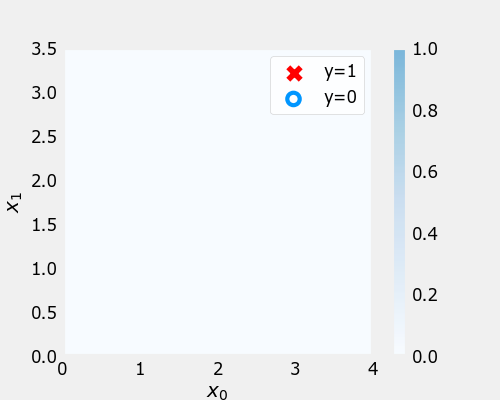

In [131]:
fig,ax = plt.subplots(1,1, figsize=(5,4))
# plot the probability
plt_prob(ax, w_out, b_out)

# Plot the original data
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
ax.axis([0, 4, 0, 3.5])
plot_data(X_train, y_train, ax)

# Plot the decision boundary
x0 = -b_out/w_out[0]
x1 = -b_out/w_out[1]
ax.plot([0,x0], [x1,0], c=dlc["dlmagenta"], lw=1)
plt.show()